# Rotations and Translations

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def draw_2d_transform_M(angle = 0, translate = [0, 0, 1], Scale = [1, 1, 1], Shear = [0, 0] , points = [1, 2, 1], Projective = [0, 0] ):
    
    %matplotlib inline
    
    theta = np.radians(angle) # how much want to rotate w.r.t original vector in terms of degree
    pi = np.radians(Shear[0])
    omega = np.radians(Shear[1])
    
    c, s = np.cos(theta), np.sin(theta)    
    R = np.array(( [c,-s, 0], [s, c, 0], [0, 0, 1] ))
    
    T = np.eye(3)
    T[:,2] = translate    
    
    # Sclae Matrix
    Scale = np.diag(Scale)
    
    # Shear Matrix
    Sh = np.eye(3)
    Sh[0,1] = np.tan(pi)
    Sh[1,0] = np.tan(omega)
    
    # Proejctive matrix
    P = np.eye(3)
    
    # Find Transform Matrix
    M = np.matmul(T, R) 
    M = np.matmul(Scale,M)
    M = np.matmul(M, Sh) # Check the order of cross product !
    
    
    if (Projective[0] != 0) or (Projective[1] != 0):
        P[2,0] = Projective[0]
        P[2,1] = Projective[1]
        P[2,2] = np.sqrt(Projective[0]**2 + Projective[1]**2 )
        M = np.matmul(M, P)
#         M[2,0] = Projective[0]
#         M[2,1] = Projective[1]
#         M[2,2] = np.sqrt(Projective[0]**2 + Projective[1]**2 )
    
    
    print("The determinant of Transform Matrix",np.linalg.det(M))
    if np.linalg.det(M) == 0:
        print("The determinant of Transform Matrix is zero so give another number")
    
    P = np.array(points).T # Check it out the .T !
    
    translated_p = np.matmul(M, P)
    translated_p = translated_p / translated_p[2,:]
    
    print("The Tansform Matrix M is \n", M)
    print("")
    print("The translated point coordinates is \n", translated_p)

    
    # for showing translated frames
    
    x_axis = np.array([1, 0, 1])
    y_axis = np.array([0, 1, 1])

    rotated_x_axis = np.inner(R, x_axis.T)
    rotated_y_axis = np.inner(R, y_axis.T)
        
    def drawing_F(P, Color):
        
        plt.plot( (P[:-1, 0][0], P[:-1, 2][0]), (P[:-1, 0][1], P[:-1, 2][1]), alpha = 0.5, color = Color)
        plt.plot( (P[:-1, 1][0], P[:-1, 2][0]), (P[:-1, 1][1], P[:-1, 2][1]), alpha = 0.5, color = Color)
        plt.plot( (P[:-1, 2][0], P[:-1, 3][0]), (P[:-1, 2][1], P[:-1, 3][1]), alpha = 0.5, color = Color)
        plt.plot( (P[:-1, 4][0], P[:-1, 3][0]), (P[:-1, 4][1], P[:-1, 3][1]), alpha = 0.5, color = Color)

        return
    
    fig = plt.figure(figsize = (10, 10))

    plt.scatter(P[0], P[1], label = "original", alpha = 0.5, color = 'orange')
    
    drawing_F(P, Color = 'orange')


    plt.scatter(translated_p[0], translated_p[1],  label = "translated", alpha= 0.5, color = 'skyblue')
    drawing_F(translated_p, Color = 'skyblue')
    
    plt.arrow(0,0, 1,0, shape='full', lw=3, length_includes_head=True, head_width=.01)
    plt.arrow(0,0, 0,1, shape='full' ,lw=3, length_includes_head=True, head_width=.01)
    
    plt.axis('equal')
    
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.legend()


    return 

### 2D Translations Matrix

$$\begin{bmatrix} 1 & 0 & T_x \\ 0  & 1 & T_y \\  0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} X + T_x  \\  Y + T_y \\ 1 \end{bmatrix} $$


The determinant of Transform Matrix 1.0
The Tansform Matrix M is 
 [[ 1.  0.  2.]
 [ 0.  1. -2.]
 [ 0.  0.  1.]]

The translated point coordinates is 
 [[ 3.  4.  3.  3.  4.]
 [-1.  0.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


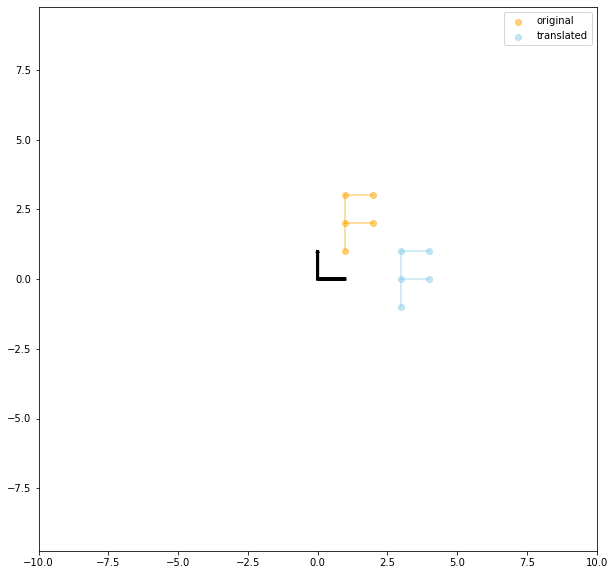

In [29]:
draw_2d_transform_M(translate = [2, -2, 1] , points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]] )

###  2D rotation Matrix

$$ \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta)  &cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}   \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} cos(\theta)X - sin(\theta)Y  \\  sin(\theta)X + cos(\theta)Y  \\ 1 \end{bmatrix} $$


The determinant of Transform Matrix 1.0
The Tansform Matrix M is 
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

The translated point coordinates is 
 [[ 0.          0.         -0.70710678 -1.41421356 -0.70710678]
 [ 1.41421356  2.82842712  2.12132034  2.82842712  3.53553391]
 [ 1.          1.          1.          1.          1.        ]]


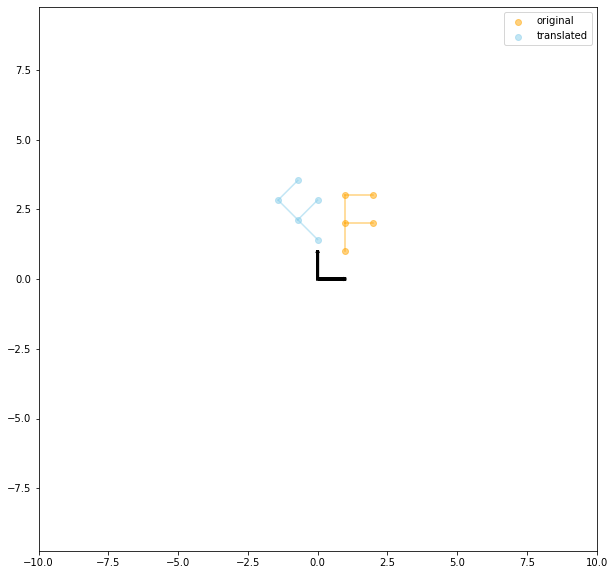

In [30]:
draw_2d_transform_M(angle = 45, points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]] )

## 2D Rotation and Translation Matrix (rigid transform matrix)

$$\begin{bmatrix} 1 & 0 & T_{x} \\ 0  & 1 & T_{y} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta)  &cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}   \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} cos(\theta)X - sin(\theta)Y + T_{x} \\  sin(\theta)X + cos(\theta)Y + T_{y} \\ 1 \end{bmatrix} $$

$$ \begin{bmatrix} cos(\theta) & -sin(\theta) & T_{x} \\ sin(\theta)  &cos(\theta) & T_{y} \\ 0 & 0 & 1 \end{bmatrix}   \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} cos(\theta)X - sin(\theta)Y + T_{x} \\  sin(\theta)X + cos(\theta)Y + T_{y} \\ 1 \end{bmatrix} $$



The determinant of Transform Matrix 1.0
The Tansform Matrix M is 
 [[ 0.70710678 -0.70710678  2.        ]
 [ 0.70710678  0.70710678 -2.        ]
 [ 0.          0.          1.        ]]

The translated point coordinates is 
 [[ 2.          2.          1.29289322  0.58578644  1.29289322]
 [-0.58578644  0.82842712  0.12132034  0.82842712  1.53553391]
 [ 1.          1.          1.          1.          1.        ]]


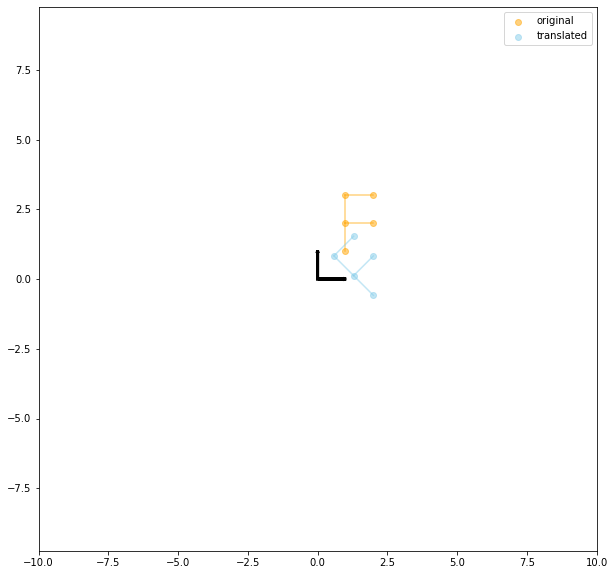

In [31]:
draw_2d_transform_M(angle = 45, translate = [2, -2, 1], points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]]  )

## 2D Similarity Matrix

$$ \begin{bmatrix} S_{x} & 0 & 0 \\ 0   & S_{y} & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0 & T_{x} \\ 0  & 1 & T_{y} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta)  &cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} S_{x}cos(\theta)X - S_{x}sin(\theta)Y +S_{x}T_{x} \\  S_{y}sin(\theta)X + S_{y}cos(\theta)Y + S_{y}T_{y} \\ 1 \end{bmatrix} $$


$$ \begin{bmatrix} S_{x}cos(\theta) & -S_{x}sin(\theta) & S_{x}T_{x} \\ S_{y}sin(\theta)  & S_{y}cos(\theta) & S_{y}T_{y} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix} = \begin{bmatrix} S_{x}cos(\theta)X - S_{x}sin(\theta)Y +S_{x}T_{x} \\  S_{y}sin(\theta)X + S_{y}cos(\theta)Y + S_{y}T_{y} \\ 1 \end{bmatrix} $$

The determinant of Transform Matrix 2.9999999999999996
The Tansform Matrix M is 
 [[2.  0.  0. ]
 [0.  1.5 0. ]
 [0.  0.  1. ]]

The translated point coordinates is 
 [[2.  4.  2.  2.  4. ]
 [1.5 3.  3.  4.5 4.5]
 [1.  1.  1.  1.  1. ]]


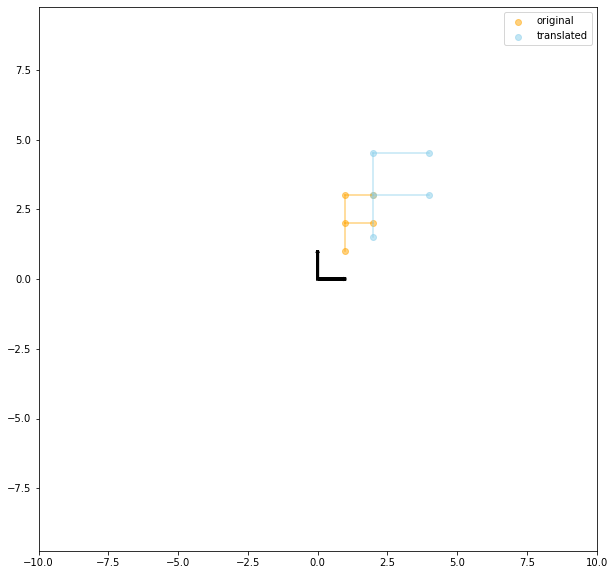

In [32]:
draw_2d_transform_M(angle = 0, Scale= [2, 1.5, 1] ,translate = [0, 0, 1] , points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]] )

## 2D Affine Matrix

$$ \begin{bmatrix} S_{x} & 0 & 0 \\ 0   & S_{y} & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0 & T_{x} \\ 0  & 1 & T_{y} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta)  &cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & h_{x} & 0 \\ h_{y}   & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  = \begin{bmatrix} S_{x}cos(\theta)X - S_{x}sin(\theta)Y +S_{x}T_{x} \\  S_{y}sin(\theta)X + S_{y}cos(\theta)Y + S_{y}T_{y} \\ 1 \end{bmatrix} $$

$$\begin{bmatrix} S_{x}cos(\theta) & -S_{x}sin(\theta) & S_{x}T_{x} \\ S_{y}sin(\theta)  & S_{y}cos(\theta) & S_{y}T_{y} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & h_{x} & 0 \\ h_{y}   & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  =$$


$$\begin{bmatrix} S_{x}cos(\theta)-h_{y}S_{x}sin(\theta) & h_{x}S_{x}cos(\theta)-S_{x}sin(\theta) &  S_{x}T_{x} \\ S_{y}sin(\theta) + h_{y}S_{y}cos(\theta)  & h_{x}S_{y}sin(\theta) + S_{y}cos(\theta) & S_{y}T_{y} \\ 0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  =  \begin{bmatrix}  (S_{x}cos(\theta)-h_{y}S_{x}sin(\theta))X + (h_{x}S_{x}cos(\theta)-S_{x}sin(\theta))Y + S_{x}T_{x}\\  ( S_{y}sin(\theta) + h_{y}S_{y}cos(\theta) )X + (h_{x}S_{y}sin(\theta) + S_{y}cos(\theta))Y +  S_{y}T_{y} \\ 1 \end{bmatrix}$$


The determinant of Transform Matrix 1.0
The Tansform Matrix M is 
 [[1. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

The translated point coordinates is 
 [[2. 4. 3. 4. 5.]
 [1. 2. 2. 3. 3.]
 [1. 1. 1. 1. 1.]]


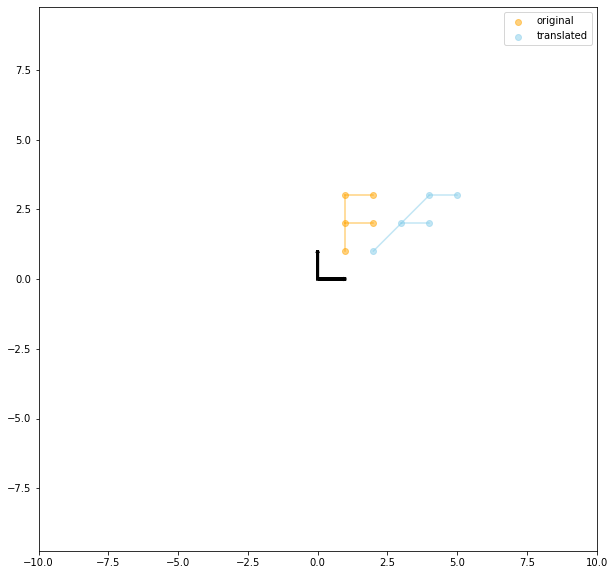

In [33]:
draw_2d_transform_M(angle = 0, Scale = [1, 1, 1], translate = [0, 0, 1], Shear = [45, 0] , points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]] )

## 2D Projective

$$\begin{bmatrix} S_{x}cos(\theta)-h_{y}S_{x}sin(\theta) & h_{x}S_{x}cos(\theta)-S_{x}sin(\theta) &  S_{x}T_{x} \\ S_{y}sin(\theta) + h_{y}S_{y}cos(\theta)  & h_{x}S_{y}sin(\theta) + S_{y}cos(\theta) & S_{y}T_{y} \\ g & h & \sqrt{g^2 + h^2} \end{bmatrix}
\begin{bmatrix} X \\  Y \\ 1 \end{bmatrix}  =  \begin{bmatrix}  \frac{(S_{x}cos(\theta)-h_{y}S_{x}sin(\theta))X + (h_{x}S_{x}cos(\theta)-S_{x}sin(\theta))Y + S_{x}T_{x}}{gX + hY + \sqrt{g^2+h^2}}\\  \frac{( S_{y}sin(\theta) + h_{y}S_{y}cos(\theta) )X + (h_{x}S_{y}sin(\theta) + S_{y}cos(\theta))Y +  S_{y}T_{y}}{gX + hY + \sqrt{g^2+h^2}} \\ \frac{gX + hY + \sqrt{g^2+h^2}}{gX + hY + \sqrt{g^2+h^2}} \end{bmatrix}$$




The determinant of Transform Matrix 2.0015993605114897
The Tansform Matrix M is 
 [[2.08       2.         2.00159936]
 [0.12       5.         3.00239904]
 [0.02       0.5        0.50039984]]

The translated point coordinates is 
 [[5.96001599 6.59672839 5.31544344 4.98990307 5.96040008]
 [7.96001599 8.59672839 8.63088689 8.9697092  8.94060011]
 [1.         1.         1.         1.         1.        ]]


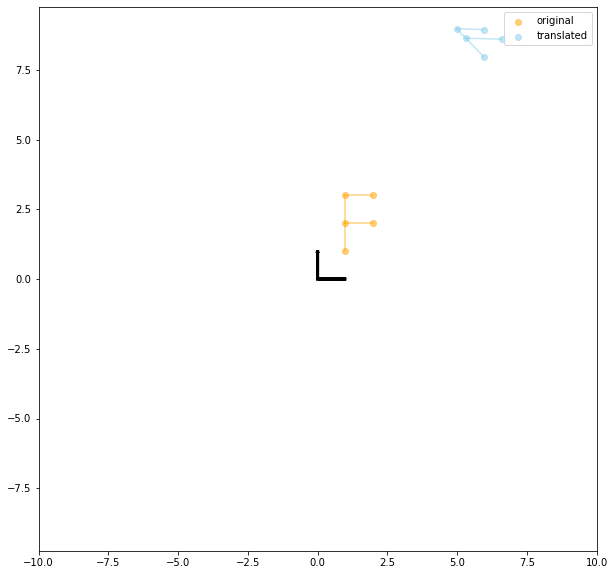

In [41]:
draw_2d_transform_M(angle = 0, Projective = [0.02, 0.5], translate=[2,3,1], Scale = [2, 2, 1], points = [[1, 1, 1], [2, 2, 1], [1, 2, 1], [1, 3, 1], [2, 3, 1]] )